# Quiz 5

The dataset contains data about 50 startups.
It has 4 columns — “R&D Spend”, “Administration”, “Marketing Spend”, “Profit”.

The first 3 columns indicate how much each startup spends on Research and Development, how much they spend on Marketing and how much they spend on Administration cost.

Your task is to predict profit.

You are expected to build multiple regression models. Keep in mind that you only have 50 rows. As data size is small, you should not use stochastic gradient!

You should compare multiple models. (Hint: RMSE)

# Setup

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from graphviz import Source
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeRegressor
from sklearn import preprocessing
from sklearn import utils

!pip install graphviz

# Get data

In [2]:
startups = pd.read_csv("startups.csv") 

In [3]:
Xs = startups.drop('Profit', axis = 1).astype(np.int)
ys= startups['Profit'].astype(np.int)

X = Xs.to_numpy()
y = ys.to_numpy()

In [4]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [5]:
lab_enc = preprocessing.LabelEncoder()
y_train = lab_enc.fit_transform(y_train)

# Decision Tree

In [6]:
dtree = DecisionTreeRegressor()

In [7]:
dtree.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [8]:
from sklearn.metrics import mean_squared_error

predictions = dtree.predict(X_test)
mse = mean_squared_error(y_test, predictions)
np.sqrt(mse)

101509.4937579732

# Linear regression using the Normal Equation

In [9]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Predict the test result

In [10]:
y_pred = regressor.predict(X_test)
mse2 = mean_squared_error(y_test, y_pred)
np.sqrt(mse2)

101509.80170633705

In [11]:
rss=((y_test-y_pred)**2).sum()
mse=np.mean((y_test-y_pred)**2)
print("Final rmse value is =",np.sqrt(np.mean((y_test-y_pred)**2)))

Final rmse value is = 101509.80170633705


# Polynomial regression

In [12]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X_poly[0]

array([1.65349000e+05, 1.36897000e+05, 4.71784000e+05, 2.73402918e+10,
       2.26357821e+10, 7.80090126e+10, 1.87407886e+10, 6.45858142e+10,
       2.22580143e+11])

In [13]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(27967.56407685604,
 array([ 6.21578614e-01,  2.33134136e-01,  1.68717928e-01, -1.07682607e-06,
         1.84184995e-06,  4.56296231e-07, -6.60778386e-07, -1.22031915e-06,
        -3.71118026e-08]))

In [14]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)              # not shown

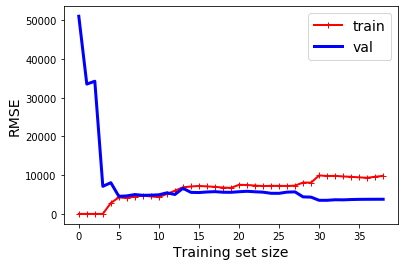

In [15]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.show()            

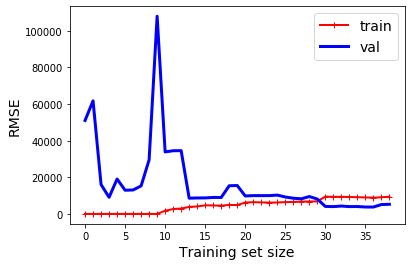

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
        ("std_scaler", StandardScaler()),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.show()             